In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# Loading the dataset

In [2]:
df = pd.read_csv("Customer_Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
df=df.drop('CUST_ID',axis=1)

In [7]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

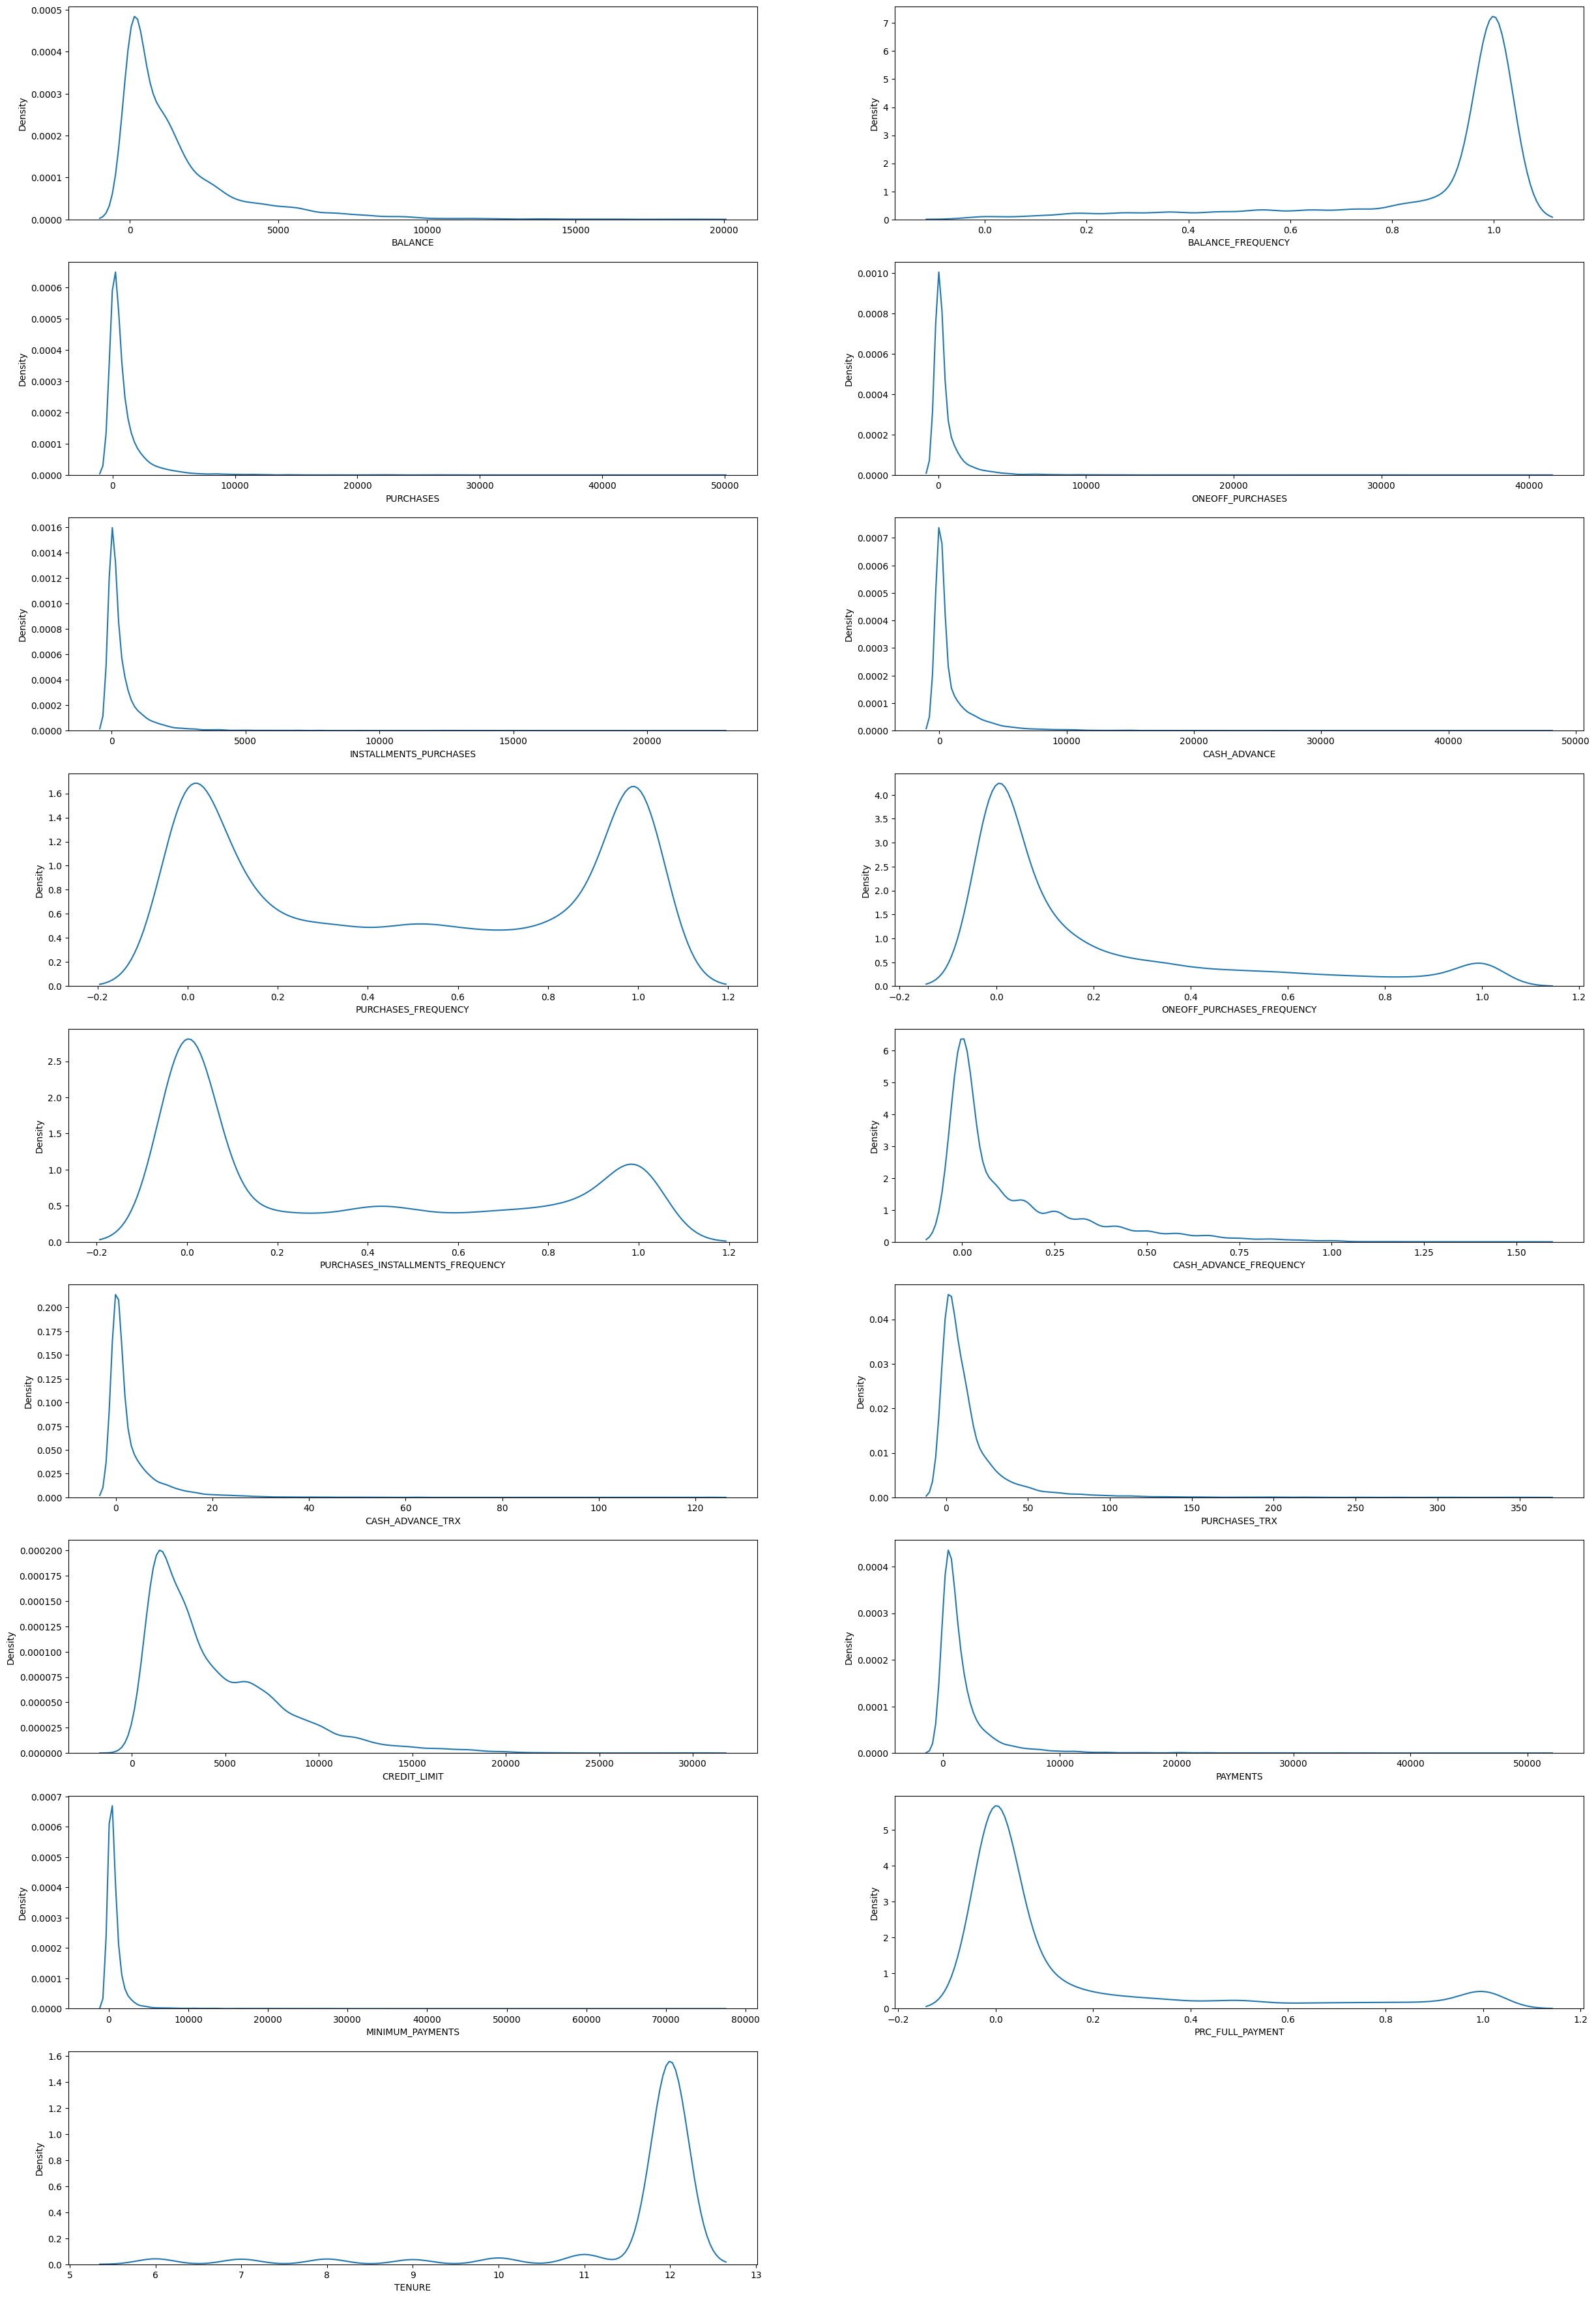

In [10]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

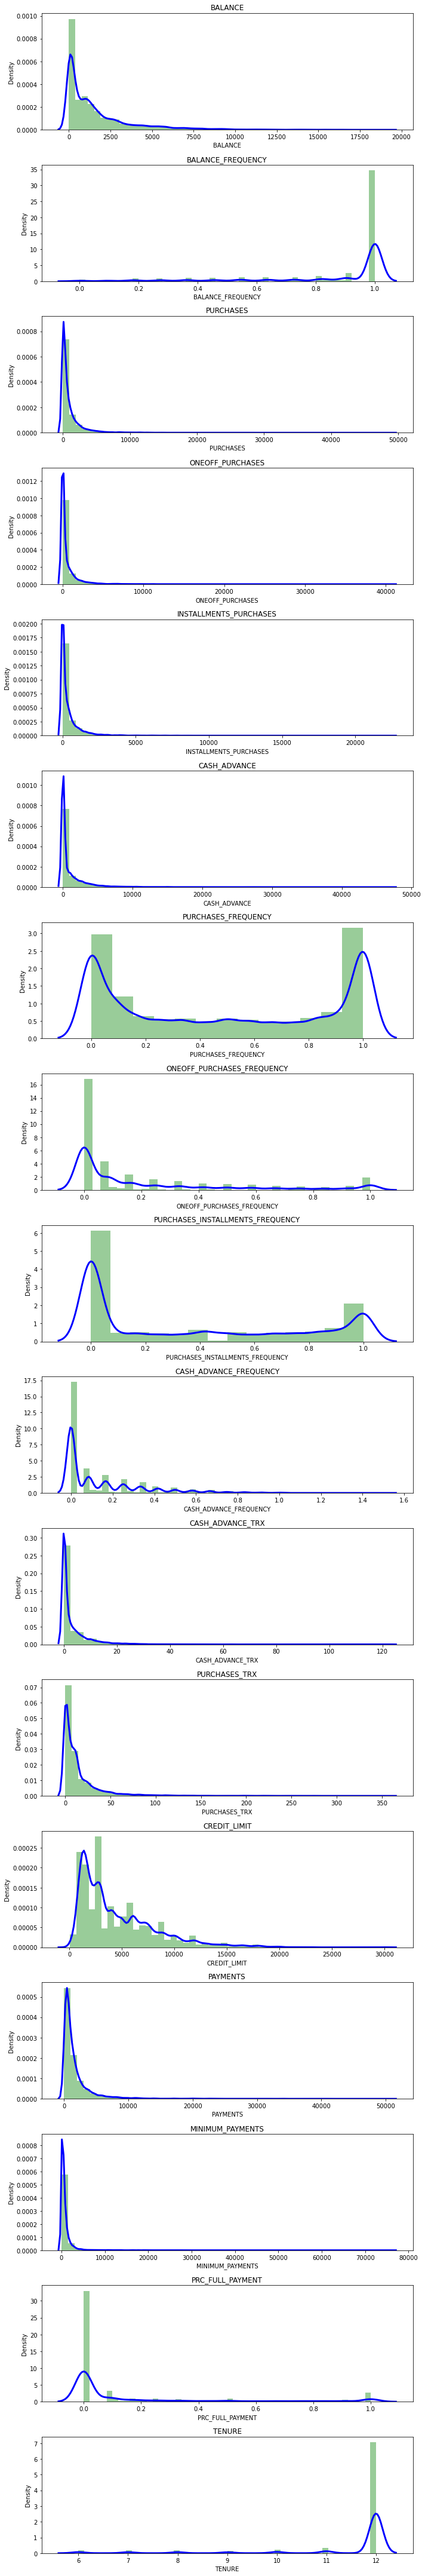

In [11]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

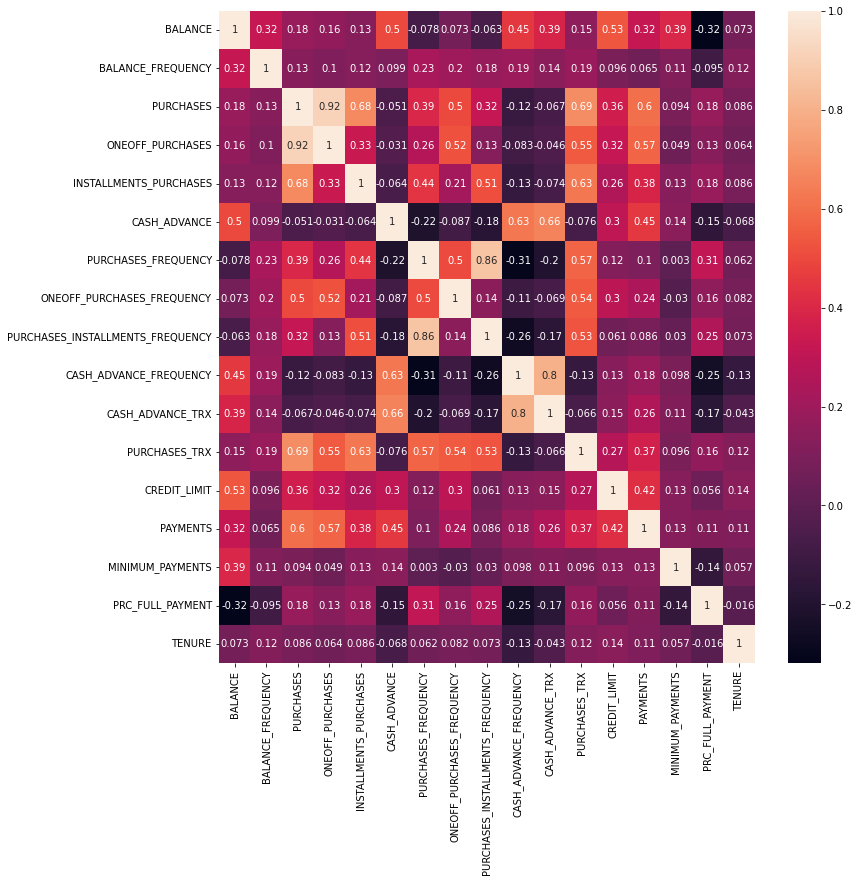

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Scaling the DataFrame

In [10]:
scaled_df = scalar.fit_transform(df)

In [12]:
import pickle
pickle.dump(scaled_df,open('scaling.pkl','wb'))

# Dimensionality reduction

Converting the DataFrame into 2D DataFrame for visualization

In [12]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682222,-1.076455
1,-1.138300,2.506461
2,0.969683,-0.383512
3,-0.873630,0.043156
4,-1.599435,-0.688581
...,...,...
8945,-0.359628,-2.016144
8946,-0.564367,-1.639123
8947,-0.926203,-1.810785
8948,-2.336550,-0.657964


# Hyperparameter tuning
Finding 'k' value by Elbow Method

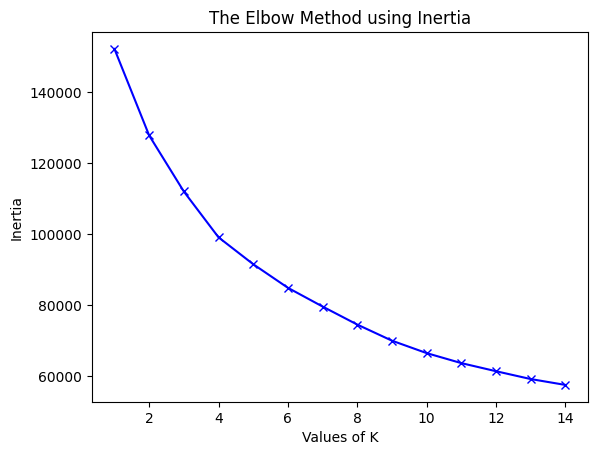

In [13]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# Model Building using KMeans

In [14]:
kmeans_model=KMeans(5)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

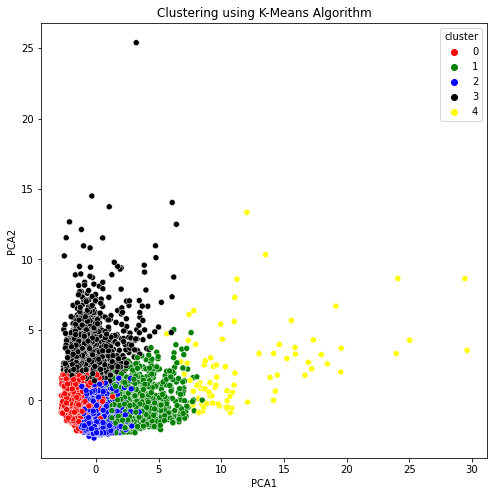

In [10]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black','yellow'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [15]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1050.825134,0.796870,278.860217,225.791285,53.271201,619.459069,0.163379,0.096890,0.065727,0.118677,2.205672,2.950434,3342.619941,1005.658947,589.902422,0.070666,11.455289
1,645.729185,0.902296,797.852919,166.799462,631.547569,178.022789,0.856458,0.083437,0.794013,0.038031,0.709317,16.645963,3198.843194,935.253786,683.766560,0.271792,11.455072
2,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
3,4616.977320,0.967882,493.136111,302.052352,191.172014,4623.363303,0.280563,0.130454,0.182218,0.490732,14.649306,7.368056,7547.920612,3589.972494,2027.669496,0.035889,11.380208
4,1894.697328,0.979455,2917.908886,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925


In [18]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [19]:
cluster_df.to_csv('final_Clustering.csv')

In [13]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [14]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
33,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.300000,12,1
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,7,41,5000.0,1617.894416,1541.141605,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,0,78,1200.0,1656.503571,172.161277,1.000000,12,1
8716,477.847191,1.000000,1006.00,942.12,63.88,0.000000,0.833333,0.750000,0.166667,0.000000,0,24,500.0,561.212055,459.735118,0.000000,12,1
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,1
8856,227.220411,1.000000,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,1,71,1000.0,1217.473837,136.283049,0.142857,8,1


In [15]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12,2
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12,2
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12,2
13,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0,26,7500.0,1655.891435,251.137986,0.083333,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.000000,6,2
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.250000,6,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.000000,6,2


In [16]:
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,3
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6,3
8840,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9,3
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,3
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,3


In [19]:
cluster_5_df = cluster_df[cluster_df["Cluster"]==4]
cluster_5_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,4
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,4
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,4
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12,4
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,946.059539,1.000000,10915.37,9323.71,1591.66,0.000000,1.000000,1.000000,1.000000,0.000000,0,93,5000.0,12612.668240,263.274743,1.000000,12,4
6640,348.342172,0.909091,11878.25,7958.96,3919.29,0.000000,1.000000,1.000000,0.416667,0.000000,0,103,6000.0,11845.841240,156.683560,0.600000,12,4
7046,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.750000,12,4
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12,4


<AxesSubplot:xlabel='Cluster', ylabel='count'>

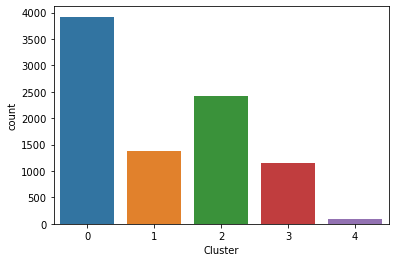

In [17]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

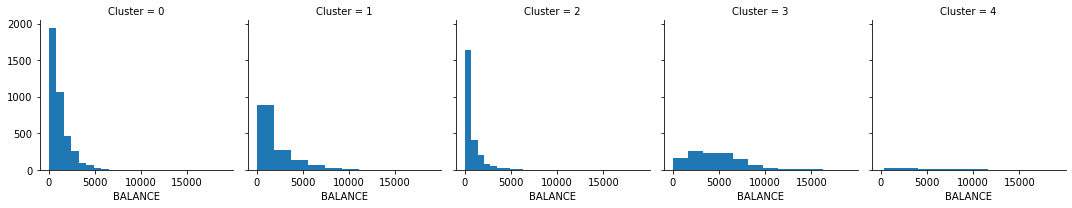

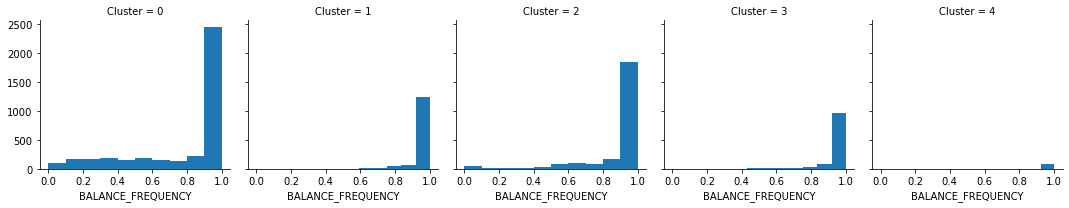

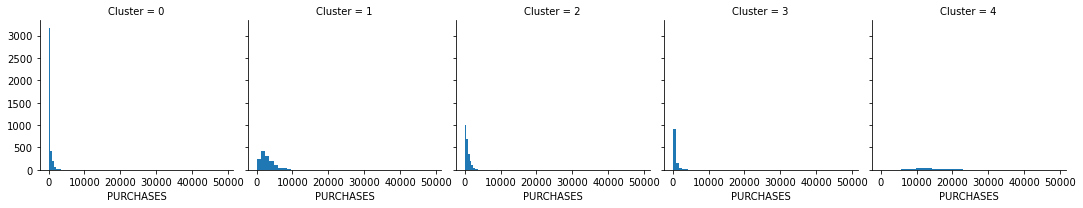

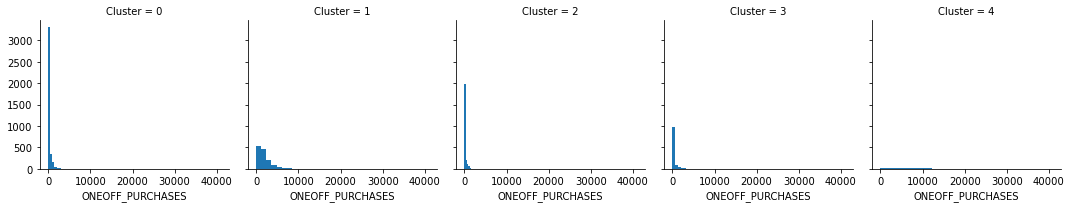

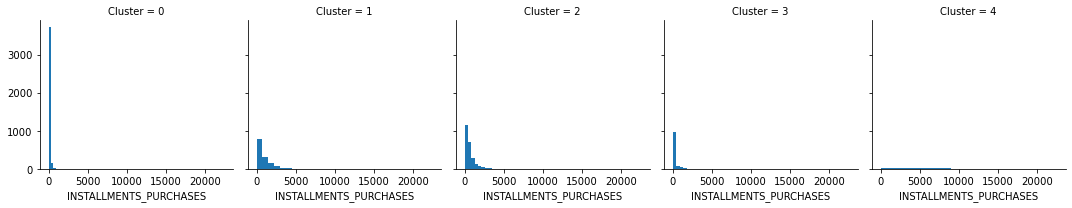

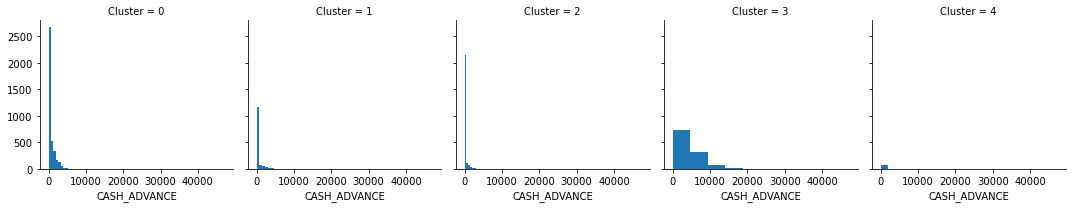

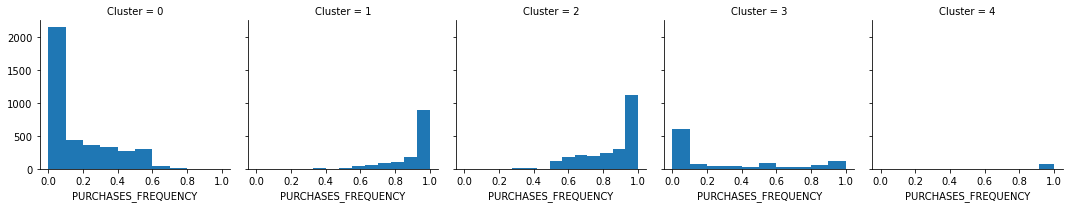

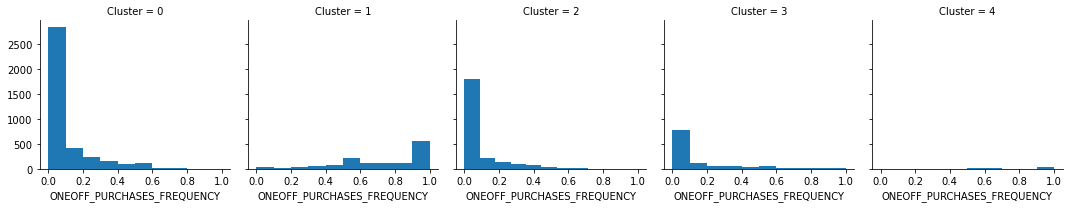

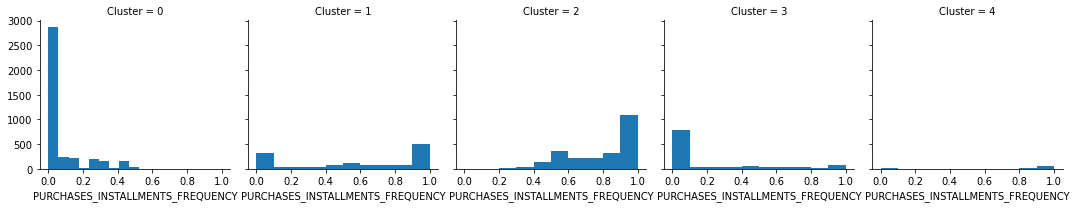

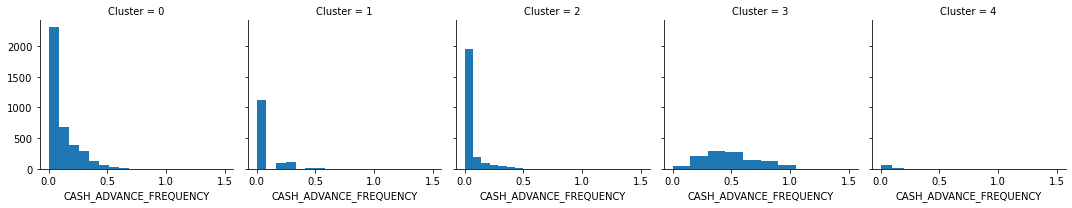

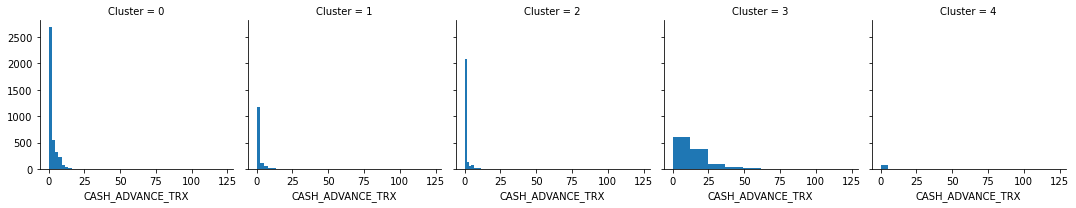

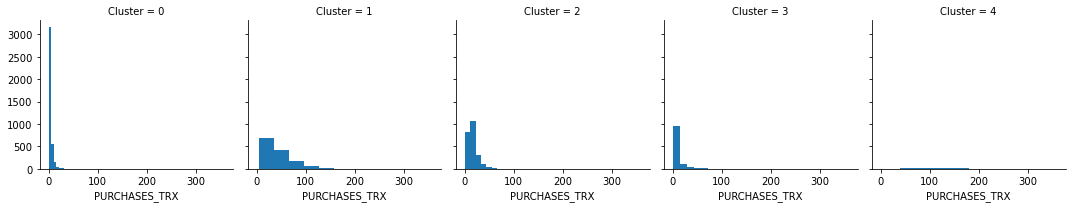

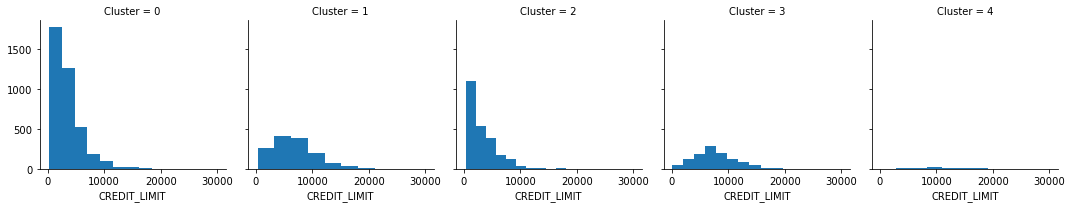

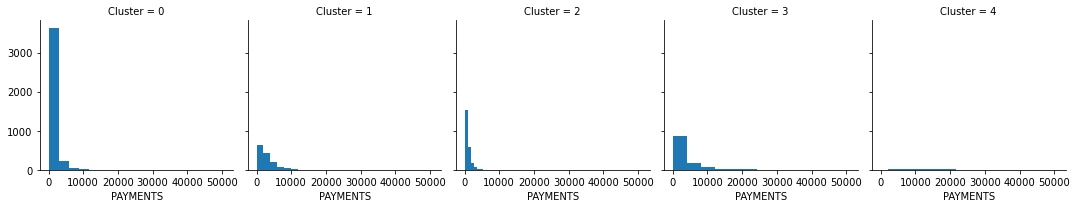

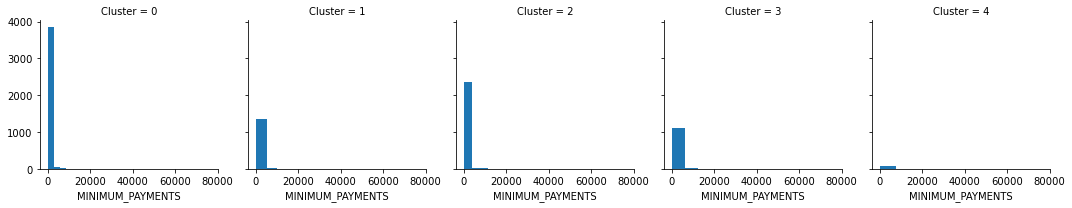

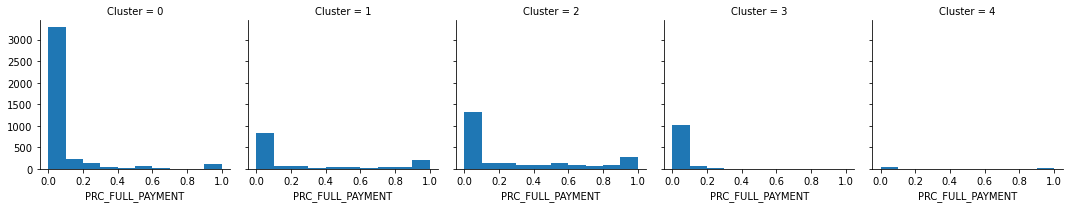

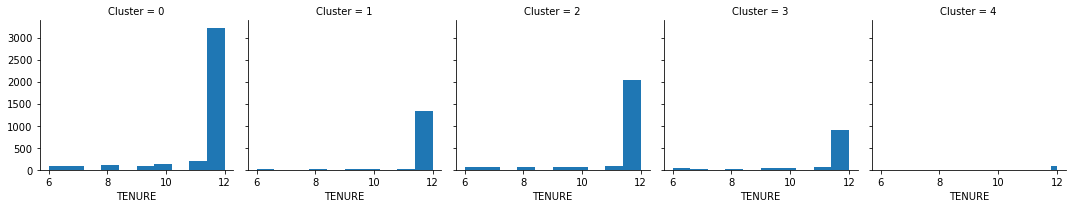

In [18]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Training and Testing the model accuracy using decision tree

In [20]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [21]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
93,1307.717841,1.000000,405.60,405.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,864.206542,0.000000,12
6809,1906.550855,1.000000,1244.37,83.53,1160.84,0.000000,0.833333,0.083333,0.833333,0.000000,0,21,1800.0,1182.128490,3748.341561,0.000000,12
7652,21.870580,0.636364,405.00,255.00,150.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,7,4000.0,414.423817,88.853589,0.000000,12
7199,1094.632736,1.000000,503.41,0.00,503.41,445.031842,1.000000,0.000000,1.000000,0.833333,21,21,1000.0,1108.862245,1194.024777,0.000000,12
3408,3333.963106,1.000000,934.07,841.07,93.00,0.000000,0.916667,0.916667,0.416667,0.000000,0,19,11500.0,867.272423,935.819727,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,7698.663007,1.000000,673.15,574.28,98.87,6076.961711,0.833333,0.250000,0.750000,0.500000,8,14,12000.0,1907.169830,2144.047631,0.000000,12
1549,1080.667451,1.000000,3895.67,697.85,3197.82,135.404437,1.000000,0.416667,1.000000,0.166667,3,49,6500.0,2571.280305,314.038049,0.166667,12
5943,3027.570865,1.000000,0.00,0.00,0.00,2081.583331,0.000000,0.000000,0.000000,0.083333,3,0,4500.0,1074.265678,883.685949,0.000000,12
2753,1168.692032,1.000000,0.00,0.00,0.00,1027.967584,0.000000,0.000000,0.000000,0.333333,4,0,5000.0,588.925093,287.740551,0.000000,12


In [22]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
874,1890.397414,1.000000,2493.67,358.00,2135.67,0.000000,1.000000,0.083333,1.000000,0.000000,0,26,3000.0,916.285608,494.455132,0.0,12
7167,231.859622,0.888889,190.00,190.00,0.00,108.768879,0.111111,0.111111,0.000000,0.111111,2,1,1200.0,119.940752,128.955873,0.0,9
468,6426.639738,1.000000,4462.86,2816.46,1646.40,4599.625146,1.000000,0.833333,0.916667,0.333333,11,103,11800.0,1793.043228,3101.017030,0.0,12
7688,4486.637152,1.000000,1712.75,1712.75,0.00,13665.032070,0.250000,0.250000,0.000000,0.750000,15,4,9500.0,10105.486720,1154.029789,0.0,12
4780,1406.483149,1.000000,0.00,0.00,0.00,363.680545,0.000000,0.000000,0.000000,0.125000,1,0,1500.0,214.423727,362.964840,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,510.953138,1.000000,172.41,172.41,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,4,1200.0,959.003305,242.770679,0.0,12
6066,2444.389258,1.000000,0.00,0.00,0.00,702.838293,0.000000,0.000000,0.000000,0.250000,3,0,2500.0,494.810805,856.617955,0.0,12
3008,3380.990237,1.000000,984.31,984.31,0.00,508.157584,1.000000,1.000000,0.000000,0.250000,4,12,3800.0,1694.781649,2591.170425,0.0,12
5981,4663.039011,1.000000,3908.26,3908.26,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,9000.0,2226.722088,1145.197102,0.0,12


In [23]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1142    8   17   20    0]
 [   8  371   21    3    6]
 [  20   21  685    2    1]
 [  28   15    5  289    1]
 [   0    2    0    1   19]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1187
           1       0.89      0.91      0.90       409
           2       0.94      0.94      0.94       729
           3       0.92      0.86      0.89       338
           4       0.70      0.86      0.78        22

    accuracy                           0.93      2685
   macro avg       0.88      0.91      0.89      2685
weighted avg       0.93      0.93      0.93      2685



# Saving the kmeans clustering model and the data with cluster label

In [26]:
import pickle
filename = 'final_modelycm.sav'
pickle.dump(model, open(filename, 'wb'))
 

#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9333333333333333 % Acuuracy
